In [24]:
#import dependencies
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
import numpy as np
import datetime 
import psycopg2 as pg
import pandas.io.sql as psql
import matplotlib as plt

# *E* extract data sets

In [25]:
#connect and load csv files
amzn_file = "Asset_Classes/AMZN_Historical.csv"
bitcoin_file = "Resources/clean_bitcoin.csv"
gld_file = "Asset_Classes/GLD_Historical.csv"
nflx_file = "Asset_Classes/NFLX_Historical.csv"
shy_file = "Asset_Classes/SHY_Historical.csv"
sp_file = "Asset_Classes/SP_Historical.csv"
uso_file = "Asset_Classes/USO_Historical.csv"
zm_file = "Asset_Classes/ZM_Historical.csv"

In [26]:
#load files into df
amzn_df = pd.read_csv(amzn_file)
bitcoin_df  = pd.read_csv(bitcoin_file)
gld_df = pd.read_csv(gld_file)
nflx_df = pd.read_csv(nflx_file)
shy_df = pd.read_csv(shy_file)
sp_df = pd.read_csv(sp_file)
uso_df = pd.read_csv(uso_file)
zm_df= pd.read_csv(zm_file)

# *T* transform bitcoin_Df

In [27]:
#transform bitcoin_Df
bitcoin_df[["date"]] = bitcoin_df[["date"]].apply(pd.to_datetime)
#drop unnamed:0 column
new_bitcoin_df = bitcoin_df.drop(columns=['Unnamed: 0'])
#rename column to match sql database table
new_bitcoin_df.rename(columns={'close': 'btc_close'}, inplace=True)
#drop duplicates
new_bitcoin_data = new_bitcoin_df.drop_duplicates(subset='date', keep='last', inplace=False)
new_bitcoin_data.head()

date  btc_close
1397 2020-01-04    7344.48
2808 2020-01-05    7356.70
4237 2020-01-06    7762.74
5676 2020-01-07    8159.01
7114 2020-01-08    8044.44

In [28]:
#Rename close columns
amzn_df.rename(columns={'close': 'amzn_close'}, inplace=True)
gld_df.rename(columns={'close': 'gld_close'}, inplace=True)
nflx_df.rename(columns={'close': 'nflx_close'}, inplace=True)
shy_df.rename(columns={'close': 'shy_close'}, inplace=True)
sp_df.rename(columns={'close': 'sp_close'}, inplace=True)
uso_df.rename(columns={'close': 'uso_close'}, inplace=True)
zm_df.rename(columns={'close': 'zm_close'}, inplace=True)

In [29]:
#Get only the columns we need from the dfs
new_amzn_data = amzn_df[["date","amzn_close"]]
new_gld_data = gld_df[["date","gld_close"]]
new_nflx_data = nflx_df[["date","nflx_close"]]
new_shy_data = shy_df[["date","shy_close"]]
new_sp_data = sp_df[["date","sp_close"]]
new_uso_data = uso_df[["date","uso_close"]]
new_zm_data = zm_df[["date","zm_close"]]

In [30]:
#Check column datatypes
new_amzn_data.dtypes

date           object
amzn_close    float64
dtype: object

In [31]:
#convert "date" column from object to datetime type
new_amzn_data[["date"]] = new_amzn_data[["date"]].apply(pd.to_datetime)
new_gld_data[["date"]] = new_gld_data[["date"]].apply(pd.to_datetime)
new_nflx_data[["date"]] = new_nflx_data[["date"]].apply(pd.to_datetime)
new_shy_data[["date"]] = new_shy_data[["date"]].apply(pd.to_datetime)
new_sp_data[["date"]] = new_sp_data[["date"]].apply(pd.to_datetime)
new_uso_data[["date"]] = new_uso_data[["date"]].apply(pd.to_datetime)
new_zm_data[["date"]] = new_zm_data[["date"]].apply(pd.to_datetime)

C:\Users\akemem02\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# Merge data sets

In [32]:
one = pd.merge(new_amzn_data,new_bitcoin_data[['date','btc_close']],
                        on = 'date')

In [33]:
two = pd.merge(one,new_gld_data [['date','gld_close']],
                        on = 'date')

In [34]:
three = pd.merge(two,new_nflx_data [['date','nflx_close']],
                        on = 'date')

In [35]:
four = pd.merge(three,new_shy_data[['date','shy_close']],
                        on = 'date')

In [36]:
five = pd.merge(four,new_sp_data[['date','sp_close']],
                        on = 'date')

In [37]:
six = pd.merge(five,new_uso_data [['date','uso_close']],
                        on = 'date')

In [38]:
seven = pd.merge(six,new_zm_data [['date','zm_close']],
                        on = 'date')

In [39]:
seven.head()

date   amzn_close  btc_close   gld_close  nflx_close  shy_close  \
0 2020-01-06  1902.880005    7762.74  147.389999  335.829987  84.709999   
1 2020-01-07  1906.859985    8159.01  147.970001  330.750000  84.709999   
2 2020-01-08  1891.969971    8044.44  146.860001  339.260010  84.669998   
3 2020-01-09  1901.050049    7806.78  146.029999  335.660004  84.680000   
4 2020-01-10  1883.160034    8200.00  146.910004  329.049988  84.699997   

   sp_close  uso_close   zm_close  
0   3243.50      13.16  70.320000  
1   3235.25      13.13  71.900002  
2   3260.25      12.66  72.550003  
3   3276.00      12.49  72.620003  
4   3264.75      12.41  73.089996

In [40]:
#drop nan rows
seven.dropna()

date   amzn_close  btc_close   gld_close  nflx_close  shy_close  \
0  2020-01-06  1902.880005    7762.74  147.389999  335.829987  84.709999   
1  2020-01-07  1906.859985    8159.01  147.970001  330.750000  84.709999   
2  2020-01-08  1891.969971    8044.44  146.860001  339.260010  84.669998   
3  2020-01-09  1901.050049    7806.78  146.029999  335.660004  84.680000   
4  2020-01-10  1883.160034    8200.00  146.910004  329.049988  84.699997   
..        ...          ...        ...         ...         ...        ...   
70 2020-04-16  2408.189941    7111.67  161.710007  439.170013  86.680000   
71 2020-04-17  2375.000000    7024.19  158.570007  422.959991  86.650002   
72 2020-04-20  2393.610107    6841.00  159.699997  437.489990  86.650002   
73 2020-04-21  2328.120117    6854.98  158.610001  433.829987  86.669998   
74 2020-04-22  2363.489990    6850.60  161.729996  421.420013  86.639999   

    sp_close  uso_close    zm_close  
0    3243.50      13.16   70.320000  
1    3235.25      13.13   71.900002  
2    3260.25      12.66   72.550003  
3    3276.00      12.49   72.620003  
4    3264.75      12.41   73.089996  
..       ...        ...         ...  
70   2863.25       4.36  150.259995  
71   2869.00       4.21  150.059998  
72   2814.00       3.75  148.990005  
73   2736.50       2.81  143.270004  
74   2775.00       2.51  150.250000  

[75 rows x 9 columns]

numpy.ndarray

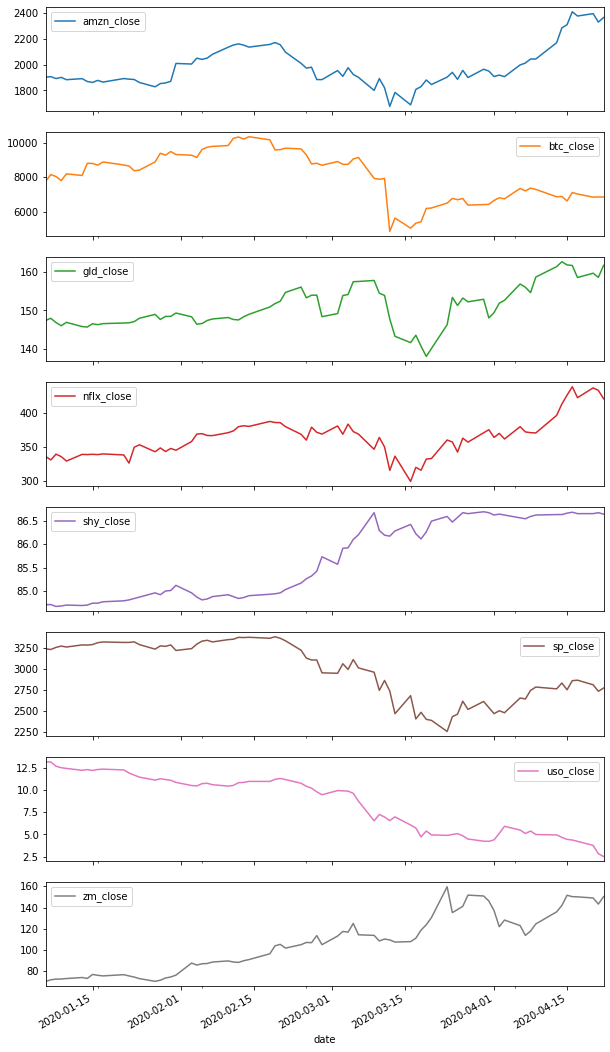

In [54]:
axes = seven.plot.line(subplots=True, x = "date", figsize=(10, 20))
type(axes)

In [42]:
#Connect to Postgres database
connection_string = "postgres:postgres@localhost:5432/assets"
engine = create_engine(f'postgresql://{connection_string}')

In [43]:
# Make sure connecting the the database worked by getting the table names
engine.table_names()

['stocks']

In [44]:
#Put our organized Pandas table into the SQL table
seven.to_sql(name='stocks', con=engine, if_exists='append', index=False)

In [45]:
#make sure it executed correctly
engine.execute("SELECT * from stocks;").fetchall()

[(datetime.date(2020, 1, 6), 1902.880005, 7762.74, 147.389999, 335.829987, 84.709999, 3243.5, 13.16, 70.32),
 (datetime.date(2020, 1, 7), 1906.859985, 8159.01, 147.970001, 330.75, 84.709999, 3235.25, 13.13, 71.900002),
 (datetime.date(2020, 1, 8), 1891.969971, 8044.44, 146.860001, 339.26001, 84.66999799999999, 3260.25, 12.66, 72.550003),
 (datetime.date(2020, 1, 9), 1901.050049, 7806.78, 146.029999, 335.660004, 84.68, 3276.0, 12.49, 72.620003),
 (datetime.date(2020, 1, 10), 1883.160034, 8200.0, 146.91000400000001, 329.049988, 84.699997, 3264.75, 12.41, 73.089996),
 (datetime.date(2020, 1, 13), 1891.300049, 8105.01, 145.820007, 338.920013, 84.690002, 3289.75, 12.2, 74.029999),
 (datetime.date(2020, 1, 14), 1869.439941, 8813.04, 145.690002, 338.690002, 84.699997, 3288.0, 12.28, 73.160004),
 (datetime.date(2020, 1, 15), 1862.02002, 8809.17, 146.53999299999998, 339.070007, 84.739998, 3293.75, 12.18, 76.940002),
 (datetime.date(2020, 1, 16), 1877.939941, 8710.15, 146.309998, 338.619995, 84.